In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [38]:
img_path = "/home/santi/personalProjects/deeplearning_udemy/reconocimiento_lunares/datasetLunares/dysplasticNevi/train/dysplasticNevi1.jpg"

In [39]:
img = cv2.imread(img_path)

In [66]:
def getFeatures(img):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  # buscamos el valor con el cual se diferencie el fondo de la imagen

  threshold,_ = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

  mask = np.uint8(1*(gray<threshold))

  # obtenemos las caracteristicas de la imagen entre 0 - 1
  # promedio de azul por cada pixel
  B = (1/255)*np.sum(img[:,:,0]*mask)/np.sum(mask)
  # promedio de verde por cada pixel
  G = (1/255)*np.sum(img[:,:,1]*mask)/np.sum(mask)
  # promedio de rojo por cada pixel
  R = (1/255)*np.sum(img[:,:,2]*mask)/np.sum(mask)

  return [B,G,R]

In [41]:
import glob

In [57]:
paths = [
    "/home/santi/personalProjects/deeplearning_udemy/reconocimiento_lunares/datasetLunares/dysplasticNevi/train/",
    "/home/santi/personalProjects/deeplearning_udemy/reconocimiento_lunares/datasetLunares/spitzNevus/train/"
]

In [77]:
feactures = []
labels = []

In [78]:
for label, path in enumerate(paths):
    for filename in glob.glob(path+"*.jpg"):
        img=cv2.imread(filename)
        feactures.append(getFeatures(img))
        labels.append(label)
        

In [79]:
features = np.array(feactures)
# por facilidad del modelo es mejor dejar los labels entre -1 y 1
labels = 2*np.array(labels)-1

Text(0.5, 0, 'R')

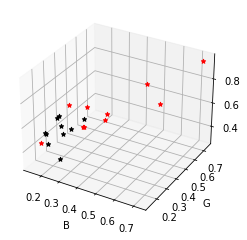

In [82]:
# visualización de las caracteristicas en un plano 3Dob
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

for i, feature_row in enumerate(features):
    if labels[i]==-1:
        ax.scatter(feature_row[0],feature_row[1],feature_row[2],marker='*', c='k')
    else:
        ax.scatter(feature_row[0],feature_row[1],feature_row[2],marker='*', c='r')
        
ax.set_xlabel('B')        
ax.set_ylabel('G')   
ax.set_zlabel('R') 